In [2]:
import time
from cycle_gan import cycleGAN 
import opt
import dataloader
import torch
from torch.utils.data import DataLoader
import os

if __name__ == '__main__':
    dataset_path = opt.dataroot
    landscape_set = dataloader.GANTransDataset(dataset_path, mode = 'sketch', image_size = opt.image_size)
    style_set = dataloader.GANTransDataset(dataset_path, mode = 'color',image_size = opt.image_size)
    dataset = dataloader.GANCombinedDataset(landscape_set, style_set)# NEW CODE LINE
    landscape_size = len(landscape_set)    # get the number of images in the dataset.
    style_size = len(style_set)
    dataset_size = len(dataset)# NEW CODE LINE
    print('dataset size = %d' %dataset_size)# NEW CODE LINE
    print('The number of training images = %d' % landscape_size)
    print('The number of style images = %d' % style_size)

    model = cycleGAN(opt)      # create a model given opt.model and other options  
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    print(device)
    model.to(device)
    model.load_networks(opt.epoch)
    Loss = model.load_loss(opt.epoch)
    # create dataloader 
    dataset_loader = DataLoader(dataset, batch_size= 1, shuffle=True) # NEW CODE LINE
    
    for epoch in range(opt.epoch_count, opt.niter + opt.niter_decay + 1):    # outer loop for different epochs; we save the model by <epoch_count>, <epoch_count>+<save_latest_freq>
        epoch_start_time = time.time()  # timer for entire epoch
        iter_data_time = time.time()    # timer for data loading per iteration
        loss_list = torch.zeros(8)
        for i, (real_A,real_B) in enumerate(dataset_loader):  # inner loop within one epoch
            iter_start_time = time.time()  # timer for computation per iteration
            model.set_input(real_A.to(device),real_B.to(device))         # unpack data from dataset and apply preprocessing
            model.forward()
            model.optimize_step()
            loss_list += torch.Tensor(model.return_loss())
        loss_list /= (i+1)
        Loss.append(loss_list)


        if epoch % opt.save_epoch_freq == 0:              # cache our model every <save_epoch_freq> epochs
            print('saving the model at the end of epoch %d' % (epoch))
            model.save_networks('latest')
            model.save_networks(epoch)
            model.save_loss(Loss, 'latest')
            model.save_loss(Loss, epoch)

        print('End of epoch %d / %d \t Time Taken: %d sec' % (epoch, opt.niter + opt.niter_decay, time.time() - epoch_start_time))
        model.update_learning_rate()                     # update learning rates at the end of every epoch.


dataset size = 21
The number of training images = 31
The number of style images = 21
cuda
No such file: saved_models/latest_net_GenA.pth
No such file: saved_models/latest_net_GenB.pth
No such file: saved_models/latest_net_DisA.pth
No such file: saved_models/latest_net_DisB.pth
End of epoch 1 / 200 	 Time Taken: 8 sec
learning rate = 0.0002000
End of epoch 2 / 200 	 Time Taken: 8 sec
learning rate = 0.0002000
End of epoch 3 / 200 	 Time Taken: 7 sec
learning rate = 0.0002000
End of epoch 4 / 200 	 Time Taken: 7 sec
learning rate = 0.0002000
End of epoch 5 / 200 	 Time Taken: 7 sec
learning rate = 0.0002000
End of epoch 6 / 200 	 Time Taken: 7 sec
learning rate = 0.0002000
End of epoch 7 / 200 	 Time Taken: 7 sec
learning rate = 0.0002000
End of epoch 8 / 200 	 Time Taken: 8 sec
learning rate = 0.0002000
End of epoch 9 / 200 	 Time Taken: 7 sec
learning rate = 0.0002000
saving the model at the end of epoch 10
End of epoch 10 / 200 	 Time Taken: 8 sec
learning rate = 0.0002000
End of epoc

End of epoch 111 / 200 	 Time Taken: 8 sec
learning rate = 0.0000200
End of epoch 112 / 200 	 Time Taken: 7 sec
learning rate = 0.0000200
End of epoch 113 / 200 	 Time Taken: 8 sec
learning rate = 0.0000200
End of epoch 114 / 200 	 Time Taken: 8 sec
learning rate = 0.0000200
End of epoch 115 / 200 	 Time Taken: 7 sec
learning rate = 0.0000200
End of epoch 116 / 200 	 Time Taken: 8 sec
learning rate = 0.0000200
End of epoch 117 / 200 	 Time Taken: 8 sec
learning rate = 0.0000200
End of epoch 118 / 200 	 Time Taken: 8 sec
learning rate = 0.0000200
End of epoch 119 / 200 	 Time Taken: 10 sec
learning rate = 0.0000200
saving the model at the end of epoch 120
End of epoch 120 / 200 	 Time Taken: 12 sec
learning rate = 0.0000200
End of epoch 121 / 200 	 Time Taken: 9 sec
learning rate = 0.0000200
End of epoch 122 / 200 	 Time Taken: 10 sec
learning rate = 0.0000200
End of epoch 123 / 200 	 Time Taken: 11 sec
learning rate = 0.0000200
End of epoch 124 / 200 	 Time Taken: 8 sec
learning rate =

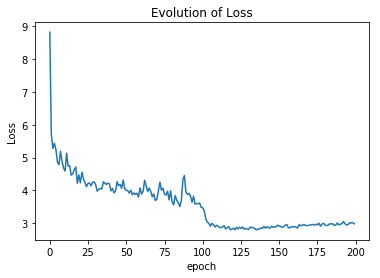

<Figure size 432x288 with 0 Axes>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
epoch ='latest'
load_filename = '%s_net_Loss.pth' % (epoch)
load_path = os.path.join('saved_models/', load_filename)
if os.path.isfile(load_path):
    Loss = torch.load(load_path)
Loss_G = torch.stack(Loss).numpy()
Loss_G = np.sum(Loss_G, axis = 1)

plt.figure()
plt.title('Evolution of Loss')
plt.plot(Loss_G)
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.show()
plt.savefig('Evolution_of_loss.jpg')